# EEG Signal Processing

*Originally written by Luke Chang*
*Adapted by Tom Yeh*

Try to use Muse app.

I adpated this lab for real-world EEG data processing.


In [1]:
%matplotlib inline

import numpy as np
from numpy import sin, pi, arange

import matplotlib.pyplot as plt
from ipywidgets import interact_manual, interact

# Read EEG data from csv

In [33]:
import csv
with open('EEG_meditate_Jack.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    list_of_rows = list(csv_reader)
#print(list_of_rows[0])

timestamps = []
TP9 = []
AF7 = []
AF8 = []
TP10 = []

for i in list_of_rows[1:]:
    timestamps.append(i[0])
    TP9.append(i[1])
    AF7.append(i[2])
    AF8.append(i[3])
    TP10.append(i[4])

#plt.plot(TP9[:1000])

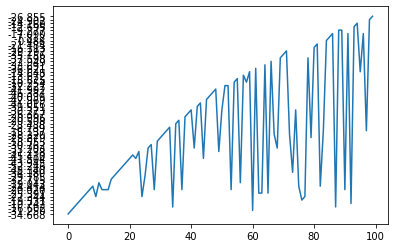

In [34]:
plt.plot(TP10[20000:20100])

# Frequency Domain

<class 'numpy.ndarray'>


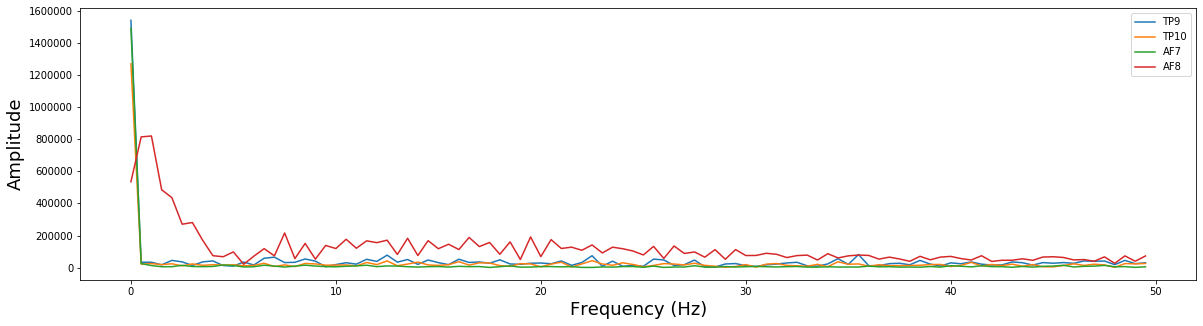

In [61]:
from numpy.fft import fft, ifft

# compute fast fourier transformation
fft_TP9 = fft(TP9)
fft_TP10 = fft(TP10)
fft_AF7 = fft(AF7)
fft_AF8 = fft(AF8)

plt.figure(figsize=(20,5))
plt.plot(np.arange(0, 100)/2, np.abs(fft_TP9)[0:100])
plt.plot(np.arange(0, 100)/2, np.abs(fft_TP10)[0:100])
plt.plot(np.arange(0, 100)/2, np.abs(fft_AF7)[0:100])
plt.plot(np.arange(0, 100)/2, np.abs(fft_AF8)[0:100])
plt.ylabel('Amplitude', fontsize=18)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.legend(['TP9','TP10','AF7','AF8'])


# Filter 

In [64]:
from scipy.signal import butter, filtfilt

filter_order = 2 
lowcut = 1
highcut = 40
sampling_frequency = 256

# Create the filter
b, a = butter(filter_order, [lowcut, highcut], btype='bandpass', output='ba', fs=sampling_frequency)
# Apply the filter
filtered_TP9 = filtfilt(b, a, TP9[20000:20100])

plt.figure(figsize=(20,5))
plt.plot(TP9[20000:20100], linewidth=2)
plt.plot(filtered_TP9, linewidth=4)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.legend(['Original','Filtered'], fontsize=18)

TypeError: ufunc 'absolute' did not contain a loop with signature matching types dtype('<U8') dtype('<U8')